# Spectral analysis of a graph with full observation /  partially observed network


In [2]:
library(igraph)
library(ggplot2)
library("igraphdata")
data(karate)
data(UKfaculty)
data(USairports)
data(enron)
data(foodwebs)
data(immuno)
data(kite)
data(macaque)
data(rfid)
data(yeast)

## Spectral analysis of a graph with full observation

1/ The function Spectrum.Laplacian(graph) takes as an input a graph object and will return the eigenvalues and the associated eigenvectors of the unnormalized graph Laplacian.

Reminder: the unnormalized graph Laplacian is equal to  L=D−A , where  D  is the degree matrix and  A  is the adjacency matrix.

In [3]:
Spectrum.Laplacian<-function(graph){
    graph.1<-as.undirected(graph)
    A <-  as.matrix(get.adjacency(graph.1))
    D <- diag(colSums(A),dim(A)[1] ,dim(A)[1] )
    L <- D - A
    return(eigen(L, symmetric=TRUE))
}

2/ the function Spectrum.Laplacian.Random.attack(graph,number.of.edges.attacked):

- removes number.of.edges.attacked number of edges in the graph, where the edges are selected randomly (Hint: use the functions delete_edges() and sample())
- computes and returns the eigenvalues and the associated eigenvectors of the unnormalized Laplacian associated with the graph after the attack.

In [4]:
Spectrum.Laplacian.Random.attack<-function(graph,number.of.edges.attacked){
    graph.1<-as.undirected(graph) 
    graph.1<- graph.1 %>%delete_edges(sample(1:length(degree(graph.1)))[1:number.of.edges.attacked])
    A <-  as.matrix(get.adjacency(graph.1))
    D <- diag(colSums(A),dim(A)[1] ,dim(A)[1] )
    L <-   D - A
    return(eigen(L, symmetric=TRUE))
}

[1] "average degree is "


[1] 4.588235

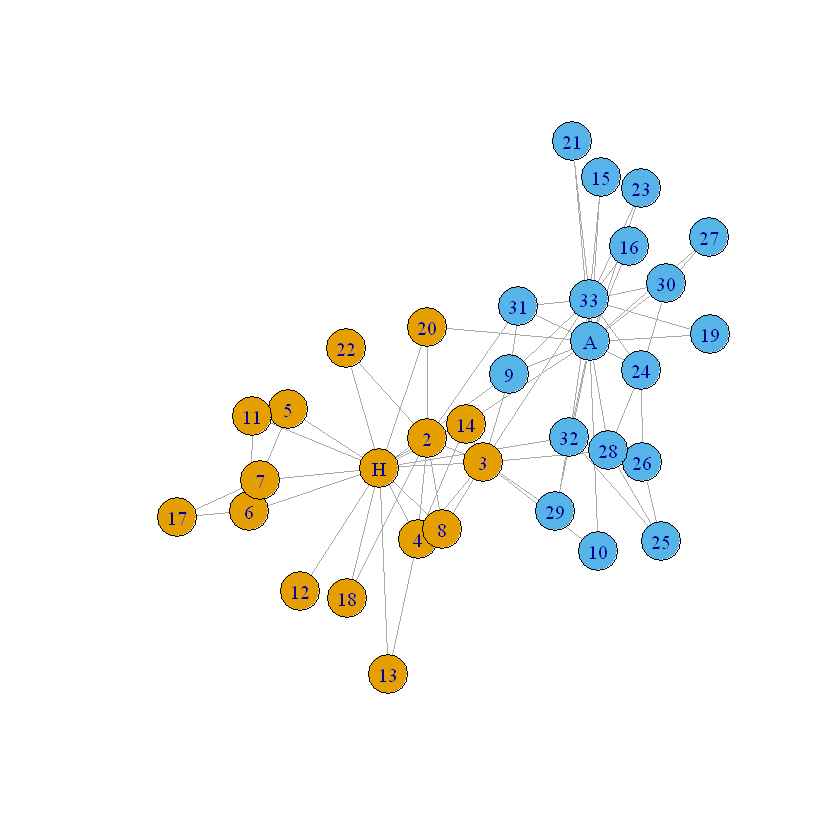

In [156]:
g = karate
plot(g,type="l")
print('average degree is ')
mean(degree(g))

In [162]:
spectrum_witout_attack = Spectrum.Laplacian(g)
spectrum_with_attack_4 = Spectrum.Laplacian.Random.attack(g,4)
spectrum_with_attack_10 = Spectrum.Laplacian.Random.attack(g,10)
spectrum_with_attack_15 = Spectrum.Laplacian.Random.attack(g,15)

In [158]:
cat(spectrum_witout_attack$values[length(spectrum_witout_attack$values)],
    spectrum_witout_attack$values[length(spectrum_witout_attack$values)-1])

-1.075813e-15 0.4685252

In [153]:
cat(spectrum_with_attack_4$values[length(spectrum_with_attack_4$values)],
    spectrum_with_attack_4$values[length(spectrum_with_attack_4$values)-1])

7.613862e-16 0.4551476

In [154]:
cat(spectrum_with_attack_10$values[length(spectrum_with_attack_10$values)],
    spectrum_with_attack_10$values[length(spectrum_with_attack_10$values)-1])

-9.433372e-16 8.271235e-16

In [155]:
cat(spectrum_with_attack_15$values[length(spectrum_with_attack_15$values)],
    spectrum_with_attack_15$values[length(spectrum_with_attack_15$values)-1])

-1.74905e-16 9.974784e-16

- Lambda 2 decreases when we cut more edges, it decreases the Robustness of the network ==>It becomes easy to cut the network into two disjoint components of similar sizes.
- We see that from 10 edges removed Lambda2 is equal to 0

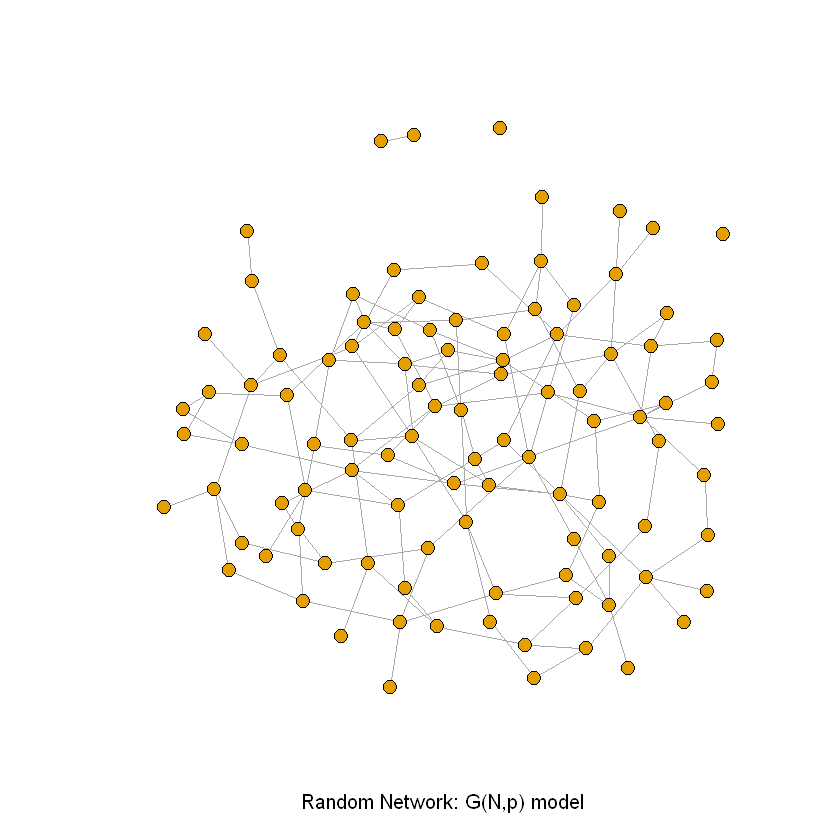

In [5]:
graph <- erdos.renyi.game(100, 0.028, type = "gnp")
plot(graph, vertex.label= NA, edge.arrow.size=0.02,vertex.size = 5, xlab = "Random Network: G(N,p) model")

In [6]:
spectrum_graph = Spectrum.Laplacian(graph)

In [11]:
round(spectrum_graph$values,3)

[1] 8.615 8.474 7.819 7.299 7.159 7.076 6.968 6.717 6.538 6.195 6.069 5.904
 [13] 5.863 5.764 5.601 5.460 5.418 5.281 5.186 5.052 4.963 4.868 4.552 4.497
 [25] 4.410 4.333 4.158 4.148 4.122 4.061 4.010 3.799 3.749 3.717 3.653 3.575
 [37] 3.440 3.389 3.375 3.252 3.159 3.050 2.998 2.862 2.813 2.791 2.681 2.652
 [49] 2.609 2.535 2.448 2.380 2.146 2.069 2.002 2.000 2.000 1.949 1.895 1.847
 [61] 1.756 1.682 1.618 1.583 1.539 1.481 1.402 1.346 1.288 1.254 1.202 1.144
 [73] 1.056 1.030 1.000 1.000 1.000 0.933 0.925 0.882 0.829 0.787 0.673 0.640
 [85] 0.585 0.530 0.485 0.472 0.428 0.389 0.362 0.327 0.281 0.275 0.224 0.180
 [97] 0.000 0.000 0.000 0.000

In [13]:
cat(' The multiplicity of the smallest eigenvalue of the unnormalized Laplacian associated with the graph defined above is :',
    sum(round(spectrum_graph$values,3)==0))

 The multiplicity of the smallest eigenvalue of the unnormalized Laplacian associated with the graph defined above is : 4

- It corresponds to the number of components of the network 

## Spectral analysis with partially observed network

5/ 

In [35]:
Numerical.integrator<-function(A,x.initial,nb.iterations){
    I<-dim(A)[1]
    x<-array(0,c(I,nb.iterations))
    x.cum<-array(0,c(I,nb.iterations))
    y1<-array(0,c(I,nb.iterations))
    Lambda<-array(0,c(nb.iterations))
    Lambda.1<-array(0,c(nb.iterations))
    Lambda[1]<-0
    x[,1]<-x.initial
    for(n in 1:(nb.iterations-1)){
        z2<- c(t(x[,n]) %*% A %*% x[,n])
        y1[,n+1]<- x[,n]+ 0.1*( A  - z2 * diag(I) ) %*% x[,n]
        x[,n+1]<- y1[,n+1] / norm(y1[,n+1], type="2") 
        Lambda.1[n+1]<- t(x[,n+1]) %*% A %*% x[,n+1]
    }
    return(list(x,Lambda.1))
}

- for this function ,I have to change it ( not working for the moment )

6/ 

In [11]:
Stochastic.approximation.scheme<-function(A,x.initial,nb.iterations,nb.,nb.iterations.1){
    I<-dim(A)[1]
    x<-array(0,c(I,nb.iterations))
    #x.cum<-array(0,c(I,nb.iterations))
    y1<-array(0,c(I,nb.iterations))
    Lambda<-array(0,c(nb.iterations))
    Lambda.1<-array(0,c(nb.iterations))
    Lambda[1]<-0
    # initialization for x drawn from a uniform law 
    x[,1]<-x.initial
    for(n in 1:(nb.iterations-1)){
        Lambda<-c()
         #Block.matrix<-array(0,c(I,nb.iterations.1))
        for(m in 1:nb.iterations.1){
            # compute the unbiased estimator of the Rayleigh quotient 
            z<-sample(I)[1]
            Lambda<-c(Lambda,I*x[z,n]*(A[z,]%*%x[,n]))
        }
        z2<-mean(Lambda)
        # compute the unbiased estimator of sum(aijxj)
        z3<-A%*%x[,n]
        # update step
        y1[,n+1]<-y1[,n]+(0.1)*(z3-(z2*diag(I))%*%x[,n])
        # projection step 
        x[,n+1]<-y1[,n+1]/norm(y1[,n+1],"2")
        # Estimate of the largest eigenvalue
        Lambda.1[n+1]<-t(x[,n+1])%*%A%*%x[,n+1]
        }
    return(list(x,Lambda.1))}

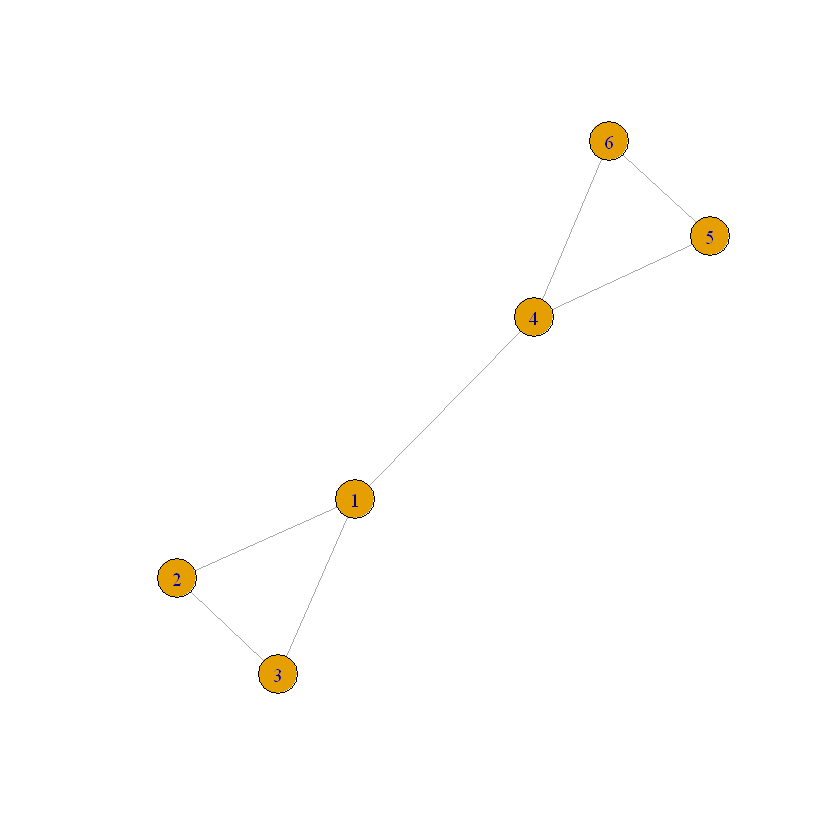

In [5]:
I<-6
A<-matrix(c(0,1,1,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,1,0),nrow=6)
g<-graph_from_adjacency_matrix(A,mode="undirected")
plot(g)
L<-diag(colSums(A))-A
epsilon<-0.001
W<-diag(array(1,c(I)))-epsilon*L
eig.W<-eigen(W)
B<-W-(1/I)*array(1,c(I))%*%t(array(1,c(I)))

- When we increase nb.iterations.1 the idea would be that the values will converge and we will have the same results between the numerical integrator and the stochastic approximation.
- our function wasn't well coded so we don't have a such result 

- According to this network, we should have three values for the eigen vectors that are near , and three others that are near and the difference between the two groups should be big 

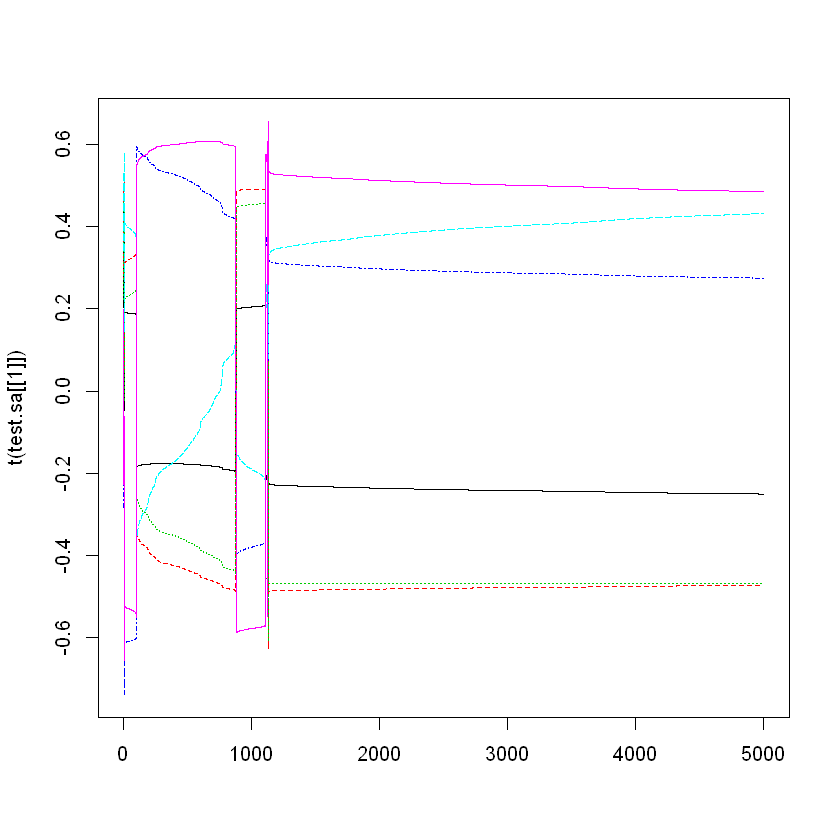

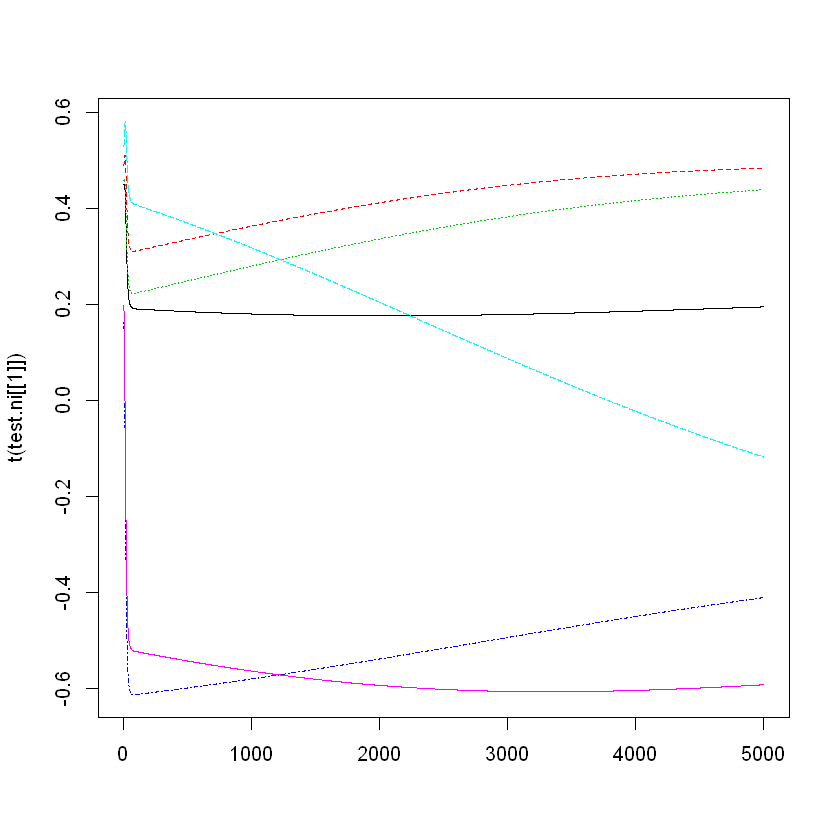

In [36]:
x.initial<-runif(I,0,1)
x.initial<-x.initial/norm(x.initial,"2")
nb.iterations<-5000
nb.iterations.1<-5
test.sa<-Stochastic.approximation.scheme(B,x.initial,nb.iterations,nb.,nb.iterations.1)
test.ni<-Numerical.integrator(B,x.initial,nb.iterations)
matplot(t(test.sa[[1]]),type="l")
matplot(t(test.ni[[1]]),type="l")

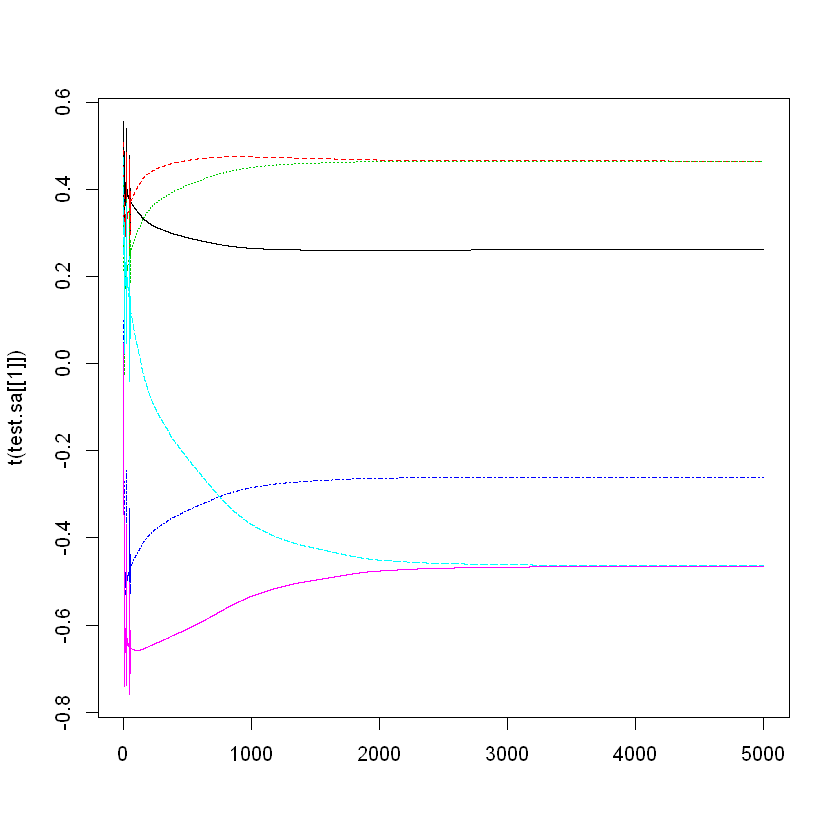

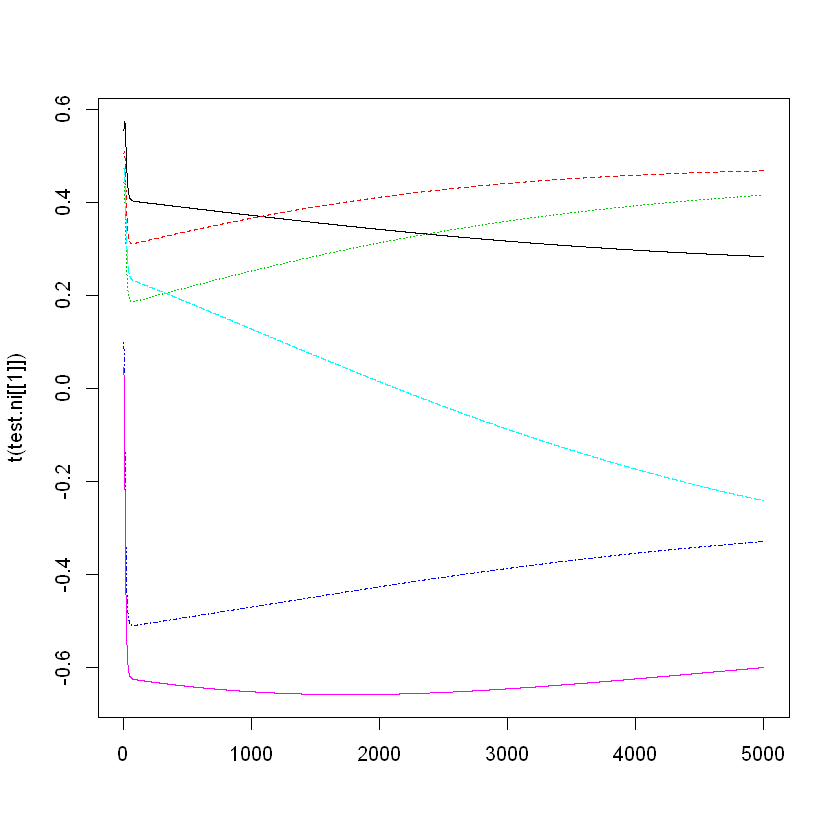

In [37]:
x.initial<-runif(I,0,1)
x.initial<-x.initial/norm(x.initial,"2")
nb.iterations<-5000
nb.iterations.1<-500
test.sa<-Stochastic.approximation.scheme(B,x.initial,nb.iterations,nb.,nb.iterations.1)
test.ni<-Numerical.integrator(B,x.initial,nb.iterations)
matplot(t(test.sa[[1]]),type="l")
matplot(t(test.ni[[1]]),type="l")